# Loan Default Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
loan=pd.read_csv('Loan_Default.csv')

In [3]:
loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
loan.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [5]:
loan.shape

(148670, 34)

In [6]:
loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
# columns with object data type
for i in loan.columns:
    if (loan[i].dtypes=='object'):
        print(i,'\t',loan[i].unique())

loan_limit 	 ['cf' nan 'ncf']
Gender 	 ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv 	 ['nopre' 'pre' nan]
loan_type 	 ['type1' 'type2' 'type3']
loan_purpose 	 ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness 	 ['l1' 'l2']
open_credit 	 ['nopc' 'opc']
business_or_commercial 	 ['nob/c' 'b/c']
Neg_ammortization 	 ['not_neg' 'neg_amm' nan]
interest_only 	 ['not_int' 'int_only']
lump_sum_payment 	 ['not_lpsm' 'lpsm']
construction_type 	 ['sb' 'mh']
occupancy_type 	 ['pr' 'sr' 'ir']
Secured_by 	 ['home' 'land']
total_units 	 ['1U' '2U' '3U' '4U']
credit_type 	 ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type 	 ['CIB' 'EXP']
age 	 ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application 	 ['to_inst' 'not_inst' nan]
Region 	 ['south' 'North' 'central' 'North-East']
Security_Type 	 ['direct' 'Indriect']


In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Dropping the columns which are not much influencing the target column

In [17]:
loan_new = loan.drop(['ID','year','rate_of_interest','Interest_rate_spread','Upfront_charges','LTV','submission_of_application','Security_Type','occupancy_type','co-applicant_credit_type','Neg_ammortization','Region'],axis=1)

In [18]:
loan_new.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'term', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'age', 'Status', 'dtir1'],
      dtype='object')

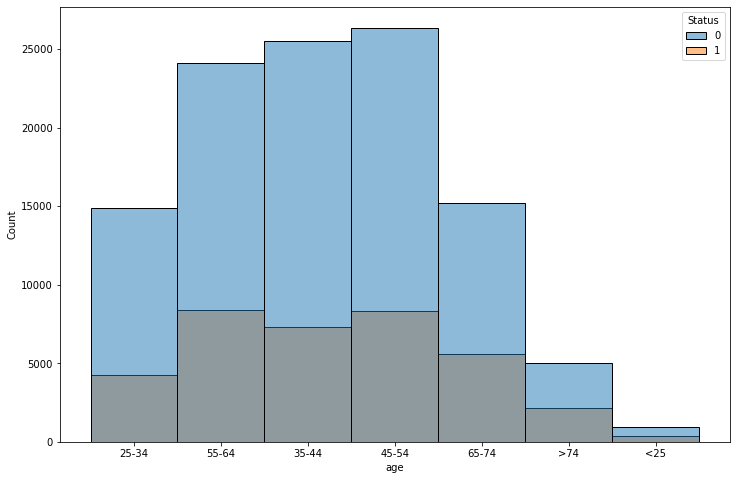

In [20]:
# plotting the histplot to see the relation between  'age' and 'status'
plt.figure(figsize=(12,8))
sns.histplot(x='age',data=loan_new,hue='Status')
plt.show()

In [21]:
#dropping the null values
loan_new.dropna(inplace=True)

In [22]:
loan_new.isnull().sum()

loan_limit                0
Gender                    0
approv_in_adv             0
loan_type                 0
loan_purpose              0
Credit_Worthiness         0
open_credit               0
business_or_commercial    0
loan_amount               0
term                      0
interest_only             0
lump_sum_payment          0
property_value            0
construction_type         0
Secured_by                0
total_units               0
income                    0
credit_type               0
Credit_Score              0
age                       0
Status                    0
dtir1                     0
dtype: int64

In [23]:
#converting the age values into numberical numerical values
age=loan_new['age'].str.lstrip('<>').str.split('-')         

In [24]:
a=[]
for i in age:
    if (len(i)==2):
        a.append((float(i[0])+float(i[1]))/2)
    else:
        a.append(float(i[0]))
        

In [25]:
loan_new['age']=a

**Plotting countplot for the all the categorical columns and their relation with "status"**

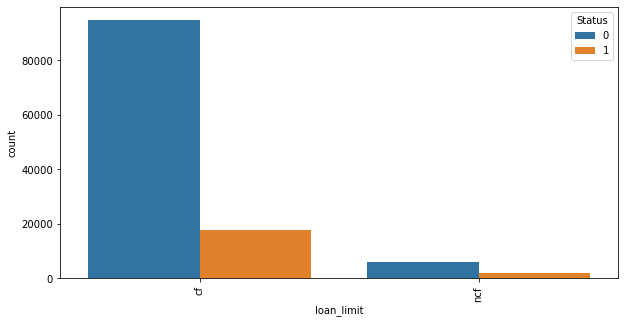

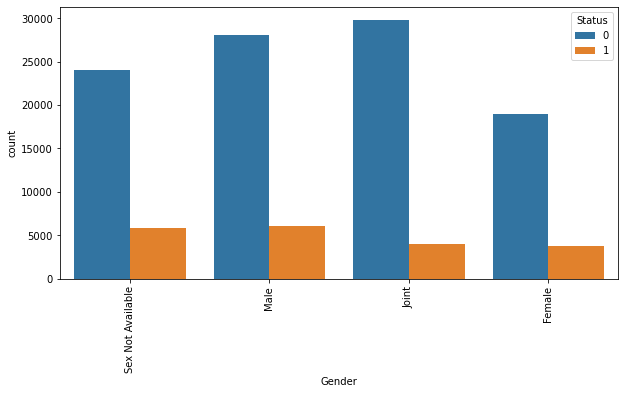

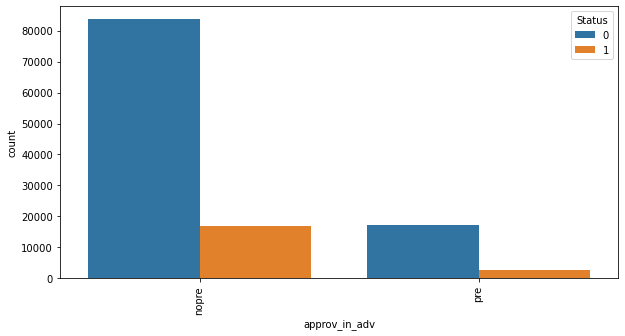

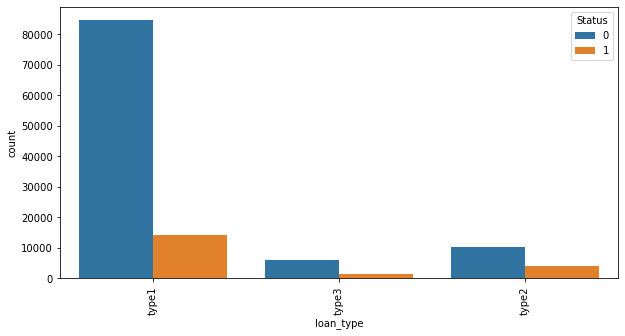

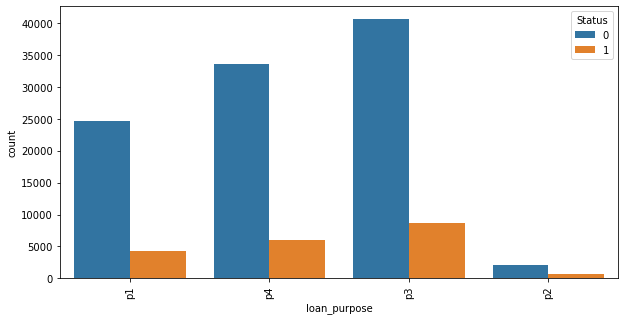

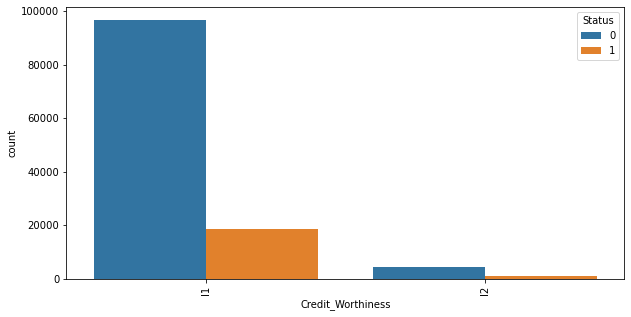

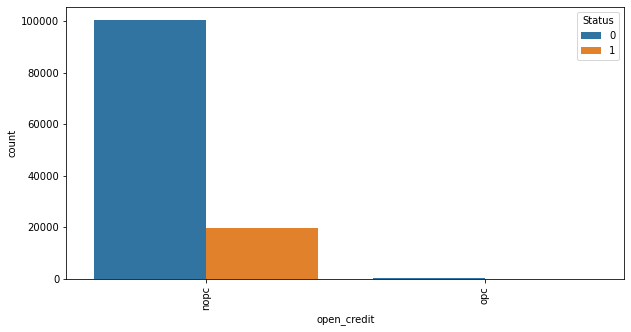

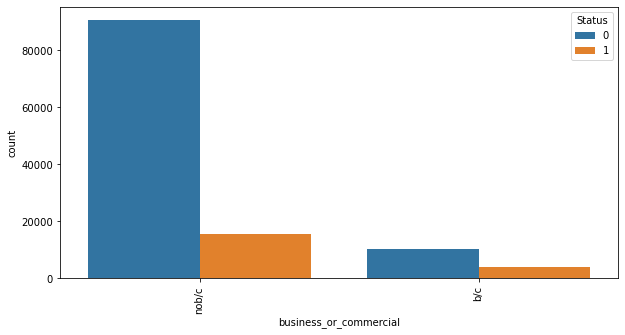

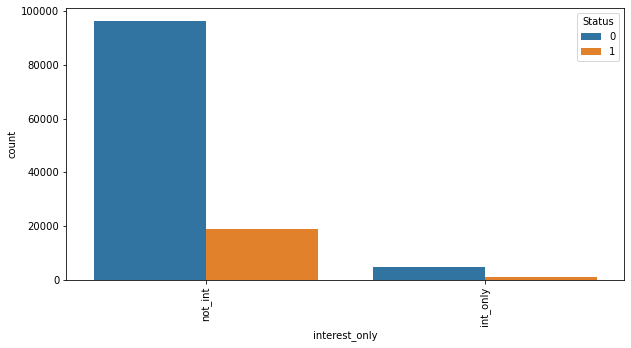

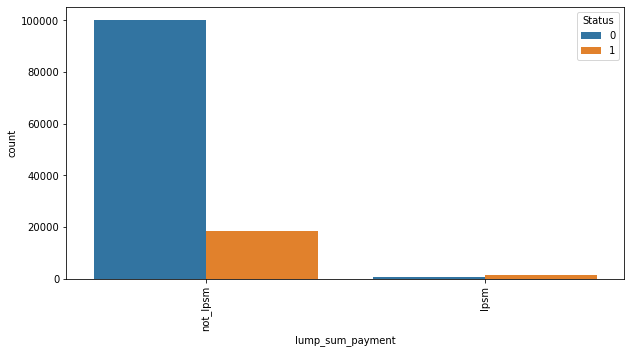

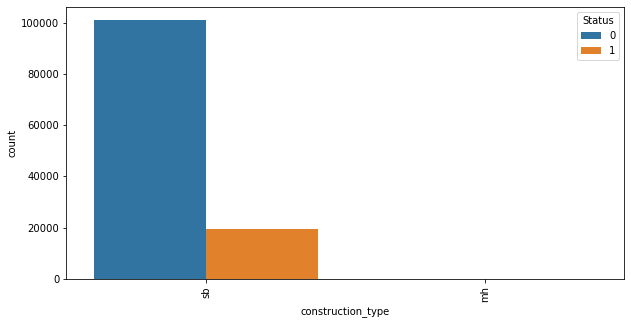

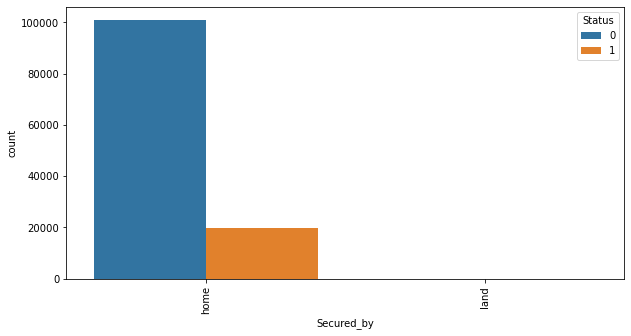

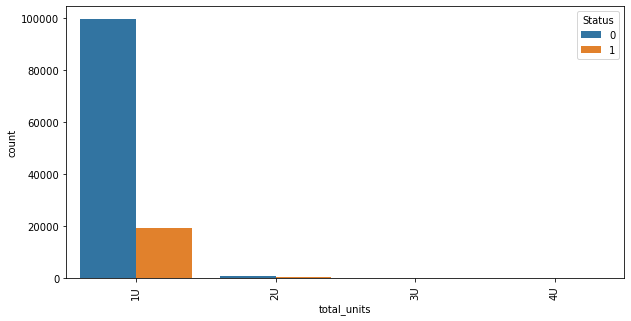

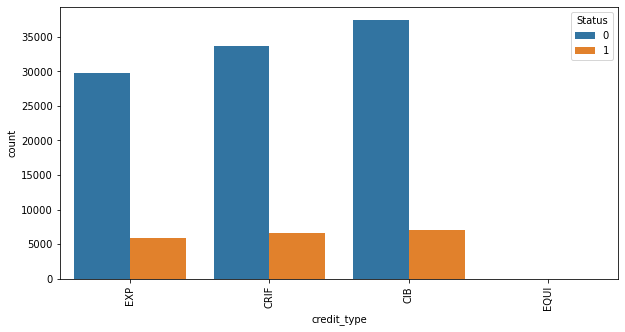

In [31]:
for j in cols:
    plt.figure(figsize=(10, 5)) 
    sns.countplot(x=j,data=loan_new,hue='Status')
    plt.xticks(rotation=90)
    plt.show()

**from the above columns we can see that some more columns can be dropped from the dataset**

In [33]:
loan_new.drop(['Gender','Secured_by'],axis=1,inplace=True)

In [34]:
cols=[]
for i in loan_new.columns:
    if (loan_new[i].dtypes=='object'):
        cols.append(i)
        print(i,'\t',loan_new[i].unique())

loan_limit 	 ['cf' 'ncf']
approv_in_adv 	 ['nopre' 'pre']
loan_type 	 ['type1' 'type3' 'type2']
loan_purpose 	 ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness 	 ['l1' 'l2']
open_credit 	 ['nopc' 'opc']
business_or_commercial 	 ['nob/c' 'b/c']
interest_only 	 ['not_int' 'int_only']
lump_sum_payment 	 ['not_lpsm' 'lpsm']
construction_type 	 ['sb' 'mh']
total_units 	 ['1U' '2U' '3U' '4U']
credit_type 	 ['EXP' 'CRIF' 'CIB' 'EQUI']


**converting the categorical columns into binary values**

In [36]:
loan_new['loan_limit']=loan_new['loan_limit'].map({'cf':1,'ncf':0}).astype('int')
loan_new['approv_in_adv']=loan_new['approv_in_adv'].map({'pre':1,'nopre':0}).astype('int')
loan_new['Credit_Worthiness']=loan_new['Credit_Worthiness'].map({'l1':1,'l2':0}).astype('int')
loan_new['open_credit']=loan_new['open_credit'].map({'opc':1,'nopc':0}).astype('int')
loan_new['business_or_commercial']=loan_new['business_or_commercial'].map({'b/c':1,'nob/c':0}).astype('int')
loan_new['interest_only']=loan_new['interest_only'].map({'int_only':1,'not_int':0}).astype('int')
loan_new['lump_sum_payment']=loan_new['lump_sum_payment'].map({'lpsm':1,'not_lpsm':0}).astype('int')
loan_new['construction_type']=loan_new['construction_type'].map({'mh':1,'sb':0}).astype('int')



In [37]:
for i in loan_new.columns:
    if (loan_new[i].dtypes=='object'):
        print(i,'\t',loan_new[i].unique())

loan_type 	 ['type1' 'type3' 'type2']
loan_purpose 	 ['p1' 'p4' 'p3' 'p2']
total_units 	 ['1U' '2U' '3U' '4U']
credit_type 	 ['EXP' 'CRIF' 'CIB' 'EQUI']


In [47]:
loan_new['total_units']=loan_new['total_units'].str.rstrip('U').astype('int')

In [38]:
#creating dummies for the columns having more than two categories
loan_new = pd.get_dummies(loan_new, columns=['loan_type','loan_purpose','credit_type'])

**Checking correlation with target feature**

In [49]:
loan_new.corrwith(loan_new['Status'])

loan_limit               -0.053731
approv_in_adv            -0.037598
Credit_Worthiness        -0.024889
open_credit              -0.010430
business_or_commercial    0.120084
loan_amount              -0.039242
term                      0.009002
interest_only             0.009186
lump_sum_payment          0.178405
property_value           -0.045411
construction_type         0.035731
total_units               0.028212
income                   -0.066065
Credit_Score              0.002860
age                       0.045774
Status                    1.000000
dtir1                     0.079574
loan_type_type1          -0.111863
loan_type_type2           0.120084
loan_type_type3           0.017139
loan_purpose_p1          -0.024933
loan_purpose_p2           0.037711
loan_purpose_p3           0.030899
loan_purpose_p4          -0.021833
credit_type_CIB          -0.007335
credit_type_CRIF          0.002622
credit_type_EQUI          0.003714
credit_type_EXP           0.005013
dtype: float64

In [50]:
loan_new.corr()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,interest_only,lump_sum_payment,property_value,...,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP
loan_limit,1.000000,-0.105022,-0.022941,-0.019811,0.016311,-0.258457,-0.016074,0.029193,0.013890,-0.200643,...,0.016311,-0.051622,-0.041889,0.006501,0.012036,0.023388,-0.004772,0.000418,0.001075,0.004605
approv_in_adv,-0.105022,1.000000,0.061696,-0.007991,0.023369,-0.033025,0.030728,-0.074633,-0.052396,-0.057599,...,0.023369,0.010827,0.169441,-0.016161,-0.059813,-0.086217,0.001960,-0.001113,0.003666,-0.000955
Credit_Worthiness,-0.022941,0.061696,1.000000,-0.235972,-0.011833,0.016653,0.008874,-0.047686,0.026753,-0.025349,...,-0.011833,-0.003489,-0.026879,-0.009796,-0.022604,0.051261,0.000140,0.001865,0.000874,-0.002084
open_credit,-0.019811,-0.007991,-0.235972,1.000000,-0.023562,-0.045628,0.027396,0.291608,-0.002472,0.135641,...,-0.023562,-0.016348,-0.034518,0.052644,0.056613,-0.044853,0.003241,0.005057,-0.000261,-0.008652
business_or_commercial,0.016311,0.023369,-0.011833,-0.023562,1.000000,-0.178972,0.081168,-0.007079,0.016752,-0.215002,...,1.000000,-0.093492,0.078450,0.005664,0.083583,-0.160667,-0.005525,-0.002410,0.004799,0.008291
loan_amount,-0.258457,-0.033025,0.016653,-0.045628,-0.178972,1.000000,0.174074,0.006602,0.001234,0.734763,...,-0.178972,-0.029315,0.027588,-0.107176,-0.156821,0.173646,0.009104,-0.001211,0.001607,-0.008390
term,-0.016074,0.030728,0.008874,0.027396,0.081168,0.174074,1.000000,0.020305,0.013849,0.049025,...,0.081168,0.052467,0.165200,-0.024662,-0.060081,-0.079343,-0.004925,0.003472,0.001787,0.001604
interest_only,0.029193,-0.074633,-0.047686,0.291608,-0.007079,0.006602,0.020305,1.000000,-0.027222,0.058257,...,-0.007079,-0.010502,-0.020450,0.007937,0.006087,0.009663,-0.003954,0.005933,-0.000896,-0.001944
lump_sum_payment,0.013890,-0.052396,0.026753,-0.002472,0.016752,0.001234,0.013849,-0.027222,1.000000,-0.004091,...,0.016752,0.001658,-0.008368,0.009138,-0.005619,0.010548,-0.001080,-0.003364,-0.000537,0.004625
property_value,-0.200643,-0.057599,-0.025349,0.135641,-0.215002,0.734763,0.049025,0.058257,-0.004091,1.000000,...,-0.215002,-0.093854,-0.133897,-0.000860,-0.047345,0.171587,0.016329,-0.001636,-0.000730,-0.015571


## Splitting the data into training and testing set

In [51]:
x = loan_new.drop('Status', axis=1)
y = loan_new['Status']

In [52]:
col=['loan_amount','term','income','Credit_Score']

**Converting the numerical columns into standard values using feature scaling method**

In [53]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[col]=st.fit_transform(x[col])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### Importing evaluation metrics

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Creating different algorithms for our Project

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc_score1=accuracy_score(y_test,y_pred)
crs_score1=np.mean(cross_val_score(model1,x,y))

## DecisionTree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc_score2=accuracy_score(y_test,y_pred)
crs_score2=np.mean(cross_val_score(model2,x,y))

## RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
model3 =RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc_score3=accuracy_score(y_test,y_pred)
crs_score3=np.mean(cross_val_score(model3,x,y))

In [60]:
from sklearn.model_selection import RandomizedSearchCV

## Hypertuning parameters- Logistic Regression

In [61]:
param={"C":np.logspace(-4,4,20),
             "solver":['liblinear','newton-cg','sag']}

In [62]:
rs_log=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=param,
                  n_iter=10,cv=5,verbose=True)

In [63]:
rs_log.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg',
                                                   'sag']},
                   verbose=True)

In [64]:
new_score1=rs_log.best_score_
new_score1

0.8425869228114182

In [65]:
rs_log.best_params_

{'solver': 'newton-cg', 'C': 29.763514416313132}

## Hypertuning parameters- Random Forest Classifier

In [66]:
rf_grid={'n_estimators':np.arange(10,800,10),
  'max_features':['auto','sqrt','log2'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [67]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=8,
                  verbose=True)

In [68]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
    

In [69]:
new_score3=rs_rf.best_score_
new_score3

0.8638275826339239

In [70]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

## Hypertuning Parameter- Decision Tree Classifier

In [71]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [72]:
rs_dt=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params,
                   cv=5,
                   n_iter=10,
                  verbose=True)

In [73]:
rs_dt.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   verbose=True)

In [74]:
new_score2=rs_dt.best_score_
new_score2

0.849507823023521

In [75]:
rs_dt.best_params_

{'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'gini'}

# Evaluation of different algorithms

In [76]:
model=['Logistic Regression','DecisionTree','RandomForest']
accuracy=[acc_score1,acc_score2,acc_score3]
crs=[crs_score1,crs_score2,crs_score3]
hp=[new_score1,new_score2,new_score3]
result=pd.DataFrame({'Algorithm':model,'Accuracy score':accuracy,'Cross val Score':crs,'Hypertuning Score':hp})
result

,Algorithm,Accuracy score,Cross val Score,Hypertuning Score
0,Logistic Regression,0.839274,0.836942,0.842587
1,DecisionTree,0.779178,0.783053,0.849508
2,RandomForest,0.867250,0.866352,0.863828


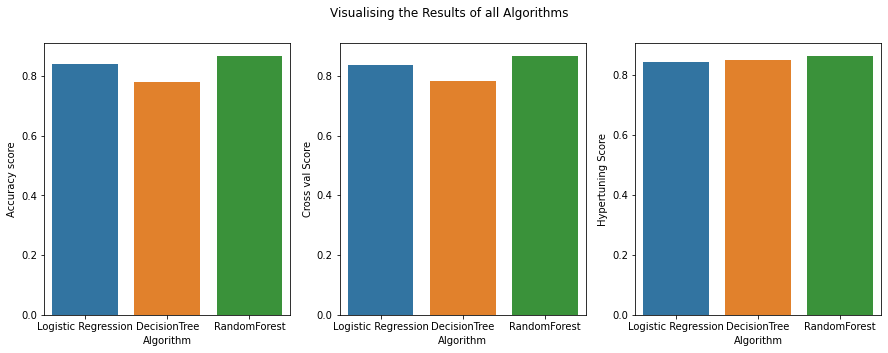

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Visualising the Results of all Algorithms')
sns.barplot(ax=axes[0],x=result['Algorithm'],y=result['Accuracy score'])
sns.barplot(ax=axes[1],x=result['Algorithm'],y=result['Cross val Score'])
sns.barplot(ax=axes[2],x=result['Algorithm'],y=result['Hypertuning Score'])

plt.show()

# Conclusion

1. we can see the score of different algorithms before and after hypertuning <br>
2. For decisionTree the score has changed significantly if we use the best parameter <br>
3. RandomForest classifier is the best model we got to predict the loan default.